In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("ganiyuolalekan/spam-assassin-email-classification-dataset")

print("Path to dataset files:", path)

# Path ke direktori dataset yang didownload
dataset_path = path # 'path' didapatkan dari cell sebelumnya

# Nama file CSV
file_name = "spam_assassin.csv"

# Menggabungkan path direktori dengan nama file
full_file_path = os.path.join(dataset_path, file_name)

# Memuat data ke dalam pandas DataFrame
dataset = pd.read_csv(full_file_path)

Using Colab cache for faster access to the 'spam-assassin-email-classification-dataset' dataset.
Path to dataset files: /kaggle/input/spam-assassin-email-classification-dataset


### Deskripsi Dataset

Dataset ini berisi koleksi email yang dikategorikan sebagai spam atau non-spam (ham). Dataset terdiri dari dua kolom utama:

- **text**: Konten lengkap dari email.
- **target**: Label yang menunjukkan apakah email tersebut spam (biasanya ditandai dengan 1) atau non-spam (ditandai dengan 0).

Dataset ini akan digunakan untuk membangun model klasifikasi yang dapat membedakan email spam dan non-spam berdasarkan konten teksnya.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5796 non-null   object
 1   target  5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB


### Data Cleaning

In [8]:
# Cek missing values
print("Missing values before cleaning:")
print(dataset.isnull().sum())

# Hapus baris dengan missing values (jika ada)
dataset.dropna(inplace=True)

# Cek duplikasi
print("\nJumlah duplikasi sebelum cleaning:")
print(dataset.duplicated().sum())

# Hapus baris duplikat
dataset.drop_duplicates(inplace=True)

# Cek missing values setelah cleaning
print("\nMissing values after cleaning:")
print(dataset.isnull().sum())

# Cek duplikasi setelah cleaning
print("\nJumlah duplikasi setelah cleaning:")
print(dataset.duplicated().sum())

# Tampilkan informasi dataset setelah cleaning
print("\nInformasi dataset setelah cleaning:")
dataset.info()

Missing values before cleaning:
text      0
target    0
dtype: int64

Jumlah duplikasi sebelum cleaning:
467

Missing values after cleaning:
text      0
target    0
dtype: int64

Jumlah duplikasi setelah cleaning:
0

Informasi dataset setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 5329 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5329 non-null   object
 1   target  5329 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.9+ KB


Sekarang dataset sudah dibersihkan dari missing values dan duplikasi. Selanjutnya kita bisa melanjutkan ke tahap pre-processing teks sesuai dengan rencana yang sudah dibuat.

### Analisis Statistik Deskriptif

In [9]:
# Analisis Statistik Deskriptif

print("\nStatistik Deskriptif untuk Kolom 'target':")
display(dataset['target'].describe())

# Jika ada kolom numerik lain setelah cleaning, statistik deskriptifnya bisa ditambahkan di sini
# Contoh:
# print("\nStatistik Deskriptif untuk Kolom Lain (jika ada):")
# display(dataset[['nama_kolom_numerik_lain']].describe())


Statistik Deskriptif untuk Kolom 'target':


,target
count,5329.000000
mean,0.317320
std,0.465477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Distribusi Email Spam vs Non-Spam

In [10]:
# Menghitung jumlah email spam (target = 1) dan non-spam (target = 0)
spam_counts = dataset['target'].value_counts()

print("Jumlah email spam dan non-spam:")
print(spam_counts)

# Menampilkan dalam persentase juga (opsional)
print("\nDistribusi dalam persentase:")
print(dataset['target'].value_counts(normalize=True) * 100)

Jumlah email spam dan non-spam:
target
0    3638
1    1691
Name: count, dtype: int64

Distribusi dalam persentase:
target
0    68.267968
1    31.732032
Name: proportion, dtype: float64


### Text Pre-processing

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (only need to run once)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (only need to run once)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


def preprocess_text(text):
    # Remove special characters and numbers, KEEPING currency symbols like $
    text = re.sub(r'[^a-zA-Z0-9\s$€£¥]', '', text) # Added 0-9 for numbers and common currency symbols
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(filtered_tokens)

# Apply the preprocessing function to the 'text' column
dataset['cleaned_text'] = dataset['text'].apply(preprocess_text)

# Display the first few rows with the new 'cleaned_text' column
print("Dataset after text pre-processing:")
display(dataset.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Dataset after text pre-processing:


,text,target,cleaned_text
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,ilugadminlinuxie mon jul 29 112802 2002 return...
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,gort44excitecom mon jun 24 175421 2002 returnp...
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,forkadminxentcom mon jul 29 113957 2002 return...
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,dcm123btamailnetcn mon jun 24 174923 2002 retu...
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0,ilugadminlinuxie mon aug 19 110247 2002 return...


### Ekstraksi Fitur (TF-IDF)

In [13]:
# Inisialisasi TfidfVectorizer
# Anda bisa mengatur parameter seperti max_features, min_df, max_df jika perlu
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Contoh: ambil 5000 fitur teratas

# Fitur diekstraksi dari kolom 'cleaned_text'
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['cleaned_text'])

# tfidf_matrix adalah sparse matrix, bisa diubah ke array dense jika diperlukan
# tfidf_array = tfidf_matrix.toarray()

print("Dimensi matriks TF-IDF:", tfidf_matrix.shape)
# Anda bisa menampilkan beberapa fitur teratas atau contoh matriks TF-IDF jika mau
# print("\nContoh nama fitur (kata-kata):")
# print(tfidf_vectorizer.get_feature_names_out()[:100])

Dimensi matriks TF-IDF: (5329, 5000)


### Analisis Ciri-ciri Spam

In [14]:
# Dapatkan nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Reset indeks dataset setelah cleaning dan pre-processing
dataset_reset_index = dataset.reset_index(drop=True)

# Pisahkan matriks TF-IDF untuk email spam
spam_indices = dataset_reset_index[dataset_reset_index['target'] == 1].index
tfidf_matrix_spam = tfidf_matrix[spam_indices]

# Hitung rata-rata bobot TF-IDF untuk setiap kata di email spam
average_tfidf_spam = tfidf_matrix_spam.mean(axis=0).A1 # .A1 untuk mengubah sparse matrix ke 1D numpy array

# Buat Series pandas untuk memudahkan sorting
tfidf_scores_spam = pd.Series(average_tfidf_spam, index=feature_names)

# Kategorikan fitur: kata, angka, dan simbol mata uang untuk SPAM
word_pattern = re.compile(r'^[a-zA-Z]+$')
number_pattern = re.compile(r'^\d+$')
currency_pattern = re.compile(r'^[$€£¥]+$')

words = tfidf_scores_spam[tfidf_scores_spam.index.str.match(word_pattern)]
numbers = tfidf_scores_spam[tfidf_scores_spam.index.str.match(number_pattern)]
currencies = tfidf_scores_spam[tfidf_scores_spam.index.str.match(currency_pattern)]

# Daftar nama hari dan bulan untuk dikecualikan
exclude_words = set(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun',
                     'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

# Filter kata-kata untuk mengecualikan nama hari dan bulan untuk SPAM
filtered_words = words[~words.index.isin(exclude_words)]

# Ambil top N dari masing-masing kategori (20 kata, 5 angka, 5 mata uang) untuk SPAM
top_20_words = filtered_words.sort_values(ascending=False).head(20)
top_5_numbers = numbers.sort_values(ascending=False).head(5)
top_5_currencies = currencies.sort_values(ascending=False).head(5)

print("Top 20 Kata (tanpa nama hari/bulan) dengan Bobot TF-IDF Tertinggi di Email Spam:")
print(top_20_words)

print("\nTop 5 Angka dengan Bobot TF-IDF Tertinggi di Email Spam:")
print(top_5_numbers)

print("\nTop 5 Simbol Mata Uang dengan Bobot TF-IDF Tertinggi di Email Spam:")
print(top_5_currencies)

# Gabungkan hasil untuk visualisasi (jika diperlukan untuk visualisasi gabungan)
top_features = pd.concat([top_20_words, top_5_numbers, top_5_currencies])

Top 20 Kata (tanpa nama hari/bulan) dengan Bobot TF-IDF Tertinggi di Email Spam:
td                          0.081399
tr                          0.071118
received                    0.056723
br                          0.044213
font                        0.043785
id                          0.041475
table                       0.039393
email                       0.029969
esmtp                       0.028154
free                        0.027551
helvetica                   0.027445
mandarklabsnetnoteinccom    0.026137
html                        0.024812
localhost                   0.024361
smtp                        0.022194
facearial                   0.021972
body                        0.021481
div                         0.020544
please                      0.019869
sansserif                   0.019715
dtype: float64

Top 5 Angka dengan Bobot TF-IDF Tertinggi di Email Spam:
2002    0.081462
0100    0.029972
24      0.023603
0500    0.020007
2001    0.018571
dtype: float64

Top 5

### Visualisasi Ciri-ciri Spam

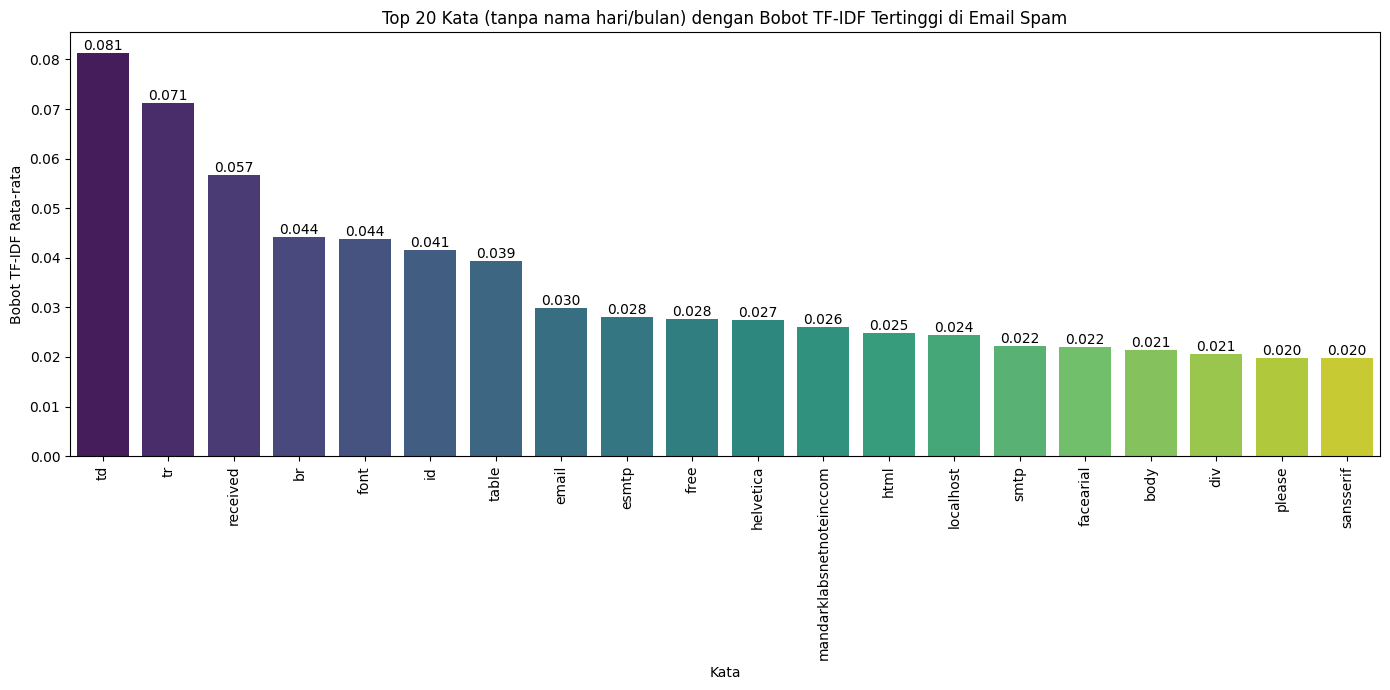

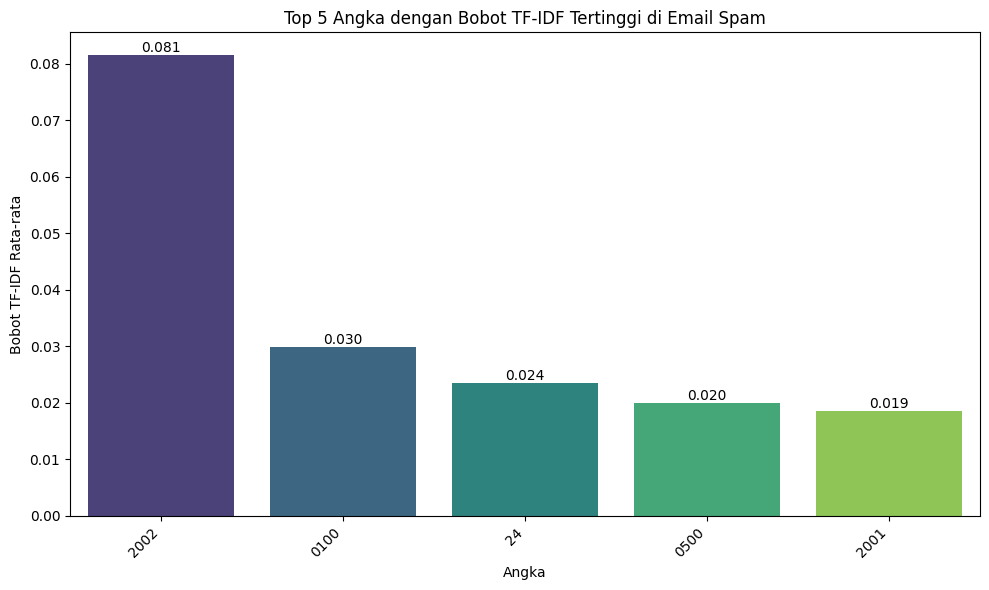


Tidak ada simbol mata uang yang ditemukan dengan bobot TF-IDF tinggi di Email Spam.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Regenerate the variables needed for plotting from cell bdd2fa03

# Inisialisasi TfidfVectorizer (kode disalin dari cell 66292d16)
# Anda bisa mengatur parameter seperti max_features, min_df, max_df jika perlu
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Contoh: ambil 5000 fitur teratas

# Fitur diekstraksi dari kolom 'cleaned_text'
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['cleaned_text'])

# Dapatkan nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Reset indeks dataset setelah cleaning dan pre-processing
dataset_reset_index = dataset.reset_index(drop=True)

# Pisahkan matriks TF-IDF untuk email spam
spam_indices = dataset_reset_index[dataset_reset_index['target'] == 1].index
tfidf_matrix_spam = tfidf_matrix[spam_indices]

# Hitung rata-rata bobot TF-IDF untuk setiap kata di email spam
average_tfidf_spam = tfidf_matrix_spam.mean(axis=0).A1 # .A1 untuk mengubah sparse matrix ke 1D numpy array

# Buat Series pandas untuk memudahkan sorting
tfidf_scores_spam = pd.Series(average_tfidf_spam, index=feature_names)

# Kategorikan fitur: kata, angka, dan simbol mata uang untuk SPAM
word_pattern = re.compile(r'^[a-zA-Z]+$')
number_pattern = re.compile(r'^\d+$')
currency_pattern = re.compile(r'^[$€£¥]+$')

words = tfidf_scores_spam[tfidf_scores_spam.index.str.match(word_pattern)]
numbers = tfidf_scores_spam[tfidf_scores_spam.index.str.match(number_pattern)]
currencies = tfidf_scores_spam[tfidf_scores_spam.index.str.match(currency_pattern)]

# Daftar nama hari dan bulan untuk dikecualikan
exclude_words = set(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun',
                     'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

# Filter kata-kata untuk mengecualikan nama hari dan bulan untuk SPAM
filtered_words = words[~words.index.isin(exclude_words)]

# Ambil top N dari masing-masing kategori (20 kata, 5 angka, 5 mata uang) untuk SPAM
top_20_words = filtered_words.sort_values(ascending=False).head(20)
top_5_numbers = numbers.sort_values(ascending=False).head(5)
top_5_currencies = currencies.sort_values(ascending=False).head(5)


# Gunakan hasil dari analisis sebelumnya: top_20_words, top_5_numbers, top_5_currencies,
# top_20_words_non_spam, top_5_numbers_non_spam

# Visualisasi 1: Top 20 Kata (Spam)
plt.figure(figsize=(14, 7))
ax1 = sns.barplot(x=top_20_words.index, y=top_20_words.values, palette='viridis', hue=top_20_words.index, legend=False)
plt.title('Top 20 Kata (tanpa nama hari/bulan) dengan Bobot TF-IDF Tertinggi di Email Spam')
plt.xlabel('Kata')
plt.ylabel('Bobot TF-IDF Rata-rata')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
# Add text labels on top of bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.3f')
plt.show()

# Visualisasi 2: Top 5 Angka (Spam)
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x=top_5_numbers.index, y=top_5_numbers.values, palette='viridis', hue=top_5_numbers.index, legend=False)
plt.title('Top 5 Angka dengan Bobot TF-IDF Tertinggi di Email Spam')
plt.xlabel('Angka')
plt.ylabel('Bobot TF-IDF Rata-rata')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Add text labels on top of bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.3f')
plt.show()

# Visualisasi 3: Top 5 Simbol Mata Uang (Spam)
if not top_5_currencies.empty: # Hanya buat plot jika ada simbol mata uang ditemukan
    plt.figure(figsize=(8, 5))
    ax3 = sns.barplot(x=top_5_currencies.index, y=top_5_currencies.values, palette='viridis', hue=top_5_currencies.index, legend=False)
    plt.title('Top 5 Simbol Mata Uang dengan Bobot TF-IDF Tertinggi di Email Spam')
    plt.xlabel('Simbol Mata Uang')
    plt.ylabel('Bobot TF-IDF Rata-rata')
    plt.tight_layout()
    # Add text labels on top of bars
    for container in ax3.containers:
        ax3.bar_label(container, fmt='%.3f')
    plt.show()
else:
    print("\nTidak ada simbol mata uang yang ditemukan dengan bobot TF-IDF tinggi di Email Spam.")

In [17]:
html_spam_example = """
<html>
<head>
<title>PENAWARAN EKSKLUSIF UNTUK ANDA!</title>
</head>
<body bgcolor="#f0f0f0">
<table width="100%" border="0" cellspacing="0" cellpadding="0">
  <tr>
    <td align="center">
      <table width="600" border="0" cellspacing="0" cellpadding="20" bgcolor="#ffffff">
        <tr>
          <td>
            <font face="Arial, sans-serif" color="#333333">
              <h2>PENAWARAN TERBATAS - JANGAN SAMPAI KETINGGALAN!</h2>
              <p>Kami punya <b>kesempatan GRATIS</b> yang luar biasa untuk Anda!</p>
              <p>Klik tautan di bawah ini untuk mengklaim hadiah Anda SEKARANG:</p>
              <p><a href="http://situs-penipuan.com/klaim-hadiah" style="color:#007bff;">KLAIM HADIAH ANDA DI SINI!</a></p>
              <br>
              <p>Ini BUKAN spam. Anda menerima email ini karena Anda terdaftar di daftar kami.</p>
              <p>Jika Anda tidak ingin menerima penawaran lagi, <a href="http://situs-penipuan.com/unsubscribe" style="color:#dc3545;">klik di sini untuk berhenti berlangganan</a>.</p>
            </font>
          </td>
        </tr>
      </table>
    </td>
  </tr>
</table>
<br>
<div align="center">
  <font face="Verdana, Geneva, sans-serif" color="#999999" size="1">
    Ini adalah email promosi. Jangan balas email ini.
  </font>
</div>
</body>
</html>
"""

print(html_spam_example)


<html>
<head>
<title>PENAWARAN EKSKLUSIF UNTUK ANDA!</title>
</head>
<body bgcolor="#f0f0f0">
<table width="100%" border="0" cellspacing="0" cellpadding="0">
  <tr>
    <td align="center">
      <table width="600" border="0" cellspacing="0" cellpadding="20" bgcolor="#ffffff">
        <tr>
          <td>
            <font face="Arial, sans-serif" color="#333333">
              <h2>PENAWARAN TERBATAS - JANGAN SAMPAI KETINGGALAN!</h2>
              <p>Kami punya <b>kesempatan GRATIS</b> yang luar biasa untuk Anda!</p>
              <p>Klik tautan di bawah ini untuk mengklaim hadiah Anda SEKARANG:</p>
              <p><a href="http://situs-penipuan.com/klaim-hadiah" style="color:#007bff;">KLAIM HADIAH ANDA DI SINI!</a></p>
              <br>
              <p>Ini BUKAN spam. Anda menerima email ini karena Anda terdaftar di daftar kami.</p>
              <p>Jika Anda tidak ingin menerima penawaran lagi, <a href="http://situs-penipuan.com/unsubscribe" style="color:#dc3545;">klik di sini untu

### Kesimpulan Analisis

Berdasarkan analisis data dan visualisasi yang telah dilakukan:

1.  **Distribusi Data**: Dataset ini memiliki **5329** email unik setelah proses pembersihan. Distribusi email non-spam (target 0) adalah sekitar **68.3%** (**3638** email), sedangkan email spam (target 1) adalah sekitar **31.7%** (**1691** email). Dataset ini memiliki ketidakseimbangan (imbalance) kelas, dengan jumlah email non-spam lebih banyak daripada email spam.

2.  **Ciri-ciri Email Spam**:
    *   **Kata Kunci**: Kata-kata dengan bobot TF-IDF rata-rata tertinggi di email spam cenderung berhubungan dengan format HTML (`td`, `tr`, `br`, `font`, `table`, `html`, `body`, `div`, `sansserif`, `facearial`), istilah teknis email (`received`, `esmtp`, `localhost`, `smtp`), serta kata-kata promosi/ajakan (`free`, `please`).
    *   **Angka**: Angka-angka yang sering muncul dengan bobot TF-IDF tinggi di email spam sebagian besar adalah angka tahun (`2002`, `2001`) dan kode waktu/zona waktu (`0100`, `0500`, `24` - kemungkinan jam atau tanggal).
    *   **Simbol Mata Uang**: Berdasarkan analisis, tidak ada simbol mata uang (`$`, `€`, `£`, `¥`) yang memiliki bobot TF-IDF rata-rata tinggi secara signifikan di email spam dalam dataset ini. Ini mungkin menunjukkan bahwa penggunaan simbol mata uang secara langsung tidak terlalu umum atau bervariasi dalam dataset spam ini.

Analisis ini memberikan wawasan awal tentang kata-kata dan pola numerik yang sering muncul di email spam, yang dapat menjadi dasar untuk pengembangan model klasifikasi spam. Namun, perlu diingat bahwa TF-IDF hanya mempertimbangkan frekuensi kata dalam dokumen dan invers dokumen, dan ciri-ciri lain seperti struktur email, pengirim, dan konteks kalimat juga penting untuk dipertimbangkan dalam model yang lebih kompleks.